In [102]:
# import this

# Pymaceuticals Inc.
---

### Analysis
* Overall, it is clear that Capomulin is a viable drug regimen to reduce tumor growth.
* Capomulin had the most number of mice complete the study, with the exception of Remicane, all other regimens observed a number of mice deaths across the duration of the study. 
* There is a strong correlation between mouse weight and tumor volume, indicating that mouse weight may be contributing to the effectiveness of any drug regimen.
* There was one potential outlier within the Infubinol regimen. While most mice showed tumor volume increase, there was one mouse that had a reduction in tumor growth in the study. 

In [103]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
complete_data = pd.merge(mouse_metadata, study_results, how = "outer", on = "Mouse ID")

# Display the data table for preview
complete_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [104]:
#checking total number of data points
complete_data.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [105]:
# Checking the number of mice.
complete_data["Mouse ID"].nunique()

249

In [106]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_data = complete_data[['Mouse ID', 'Timepoint']]
duplicate_data = duplicate_data[duplicate_data.duplicated(keep=False)]
duplicate_data

,Mouse ID,Timepoint
908,g989,0
909,g989,0
910,g989,5
911,g989,5
912,g989,10
913,g989,10
914,g989,15
915,g989,15
916,g989,20
917,g989,20


In [107]:
# Optional: Get all the data for the duplicate mouse ID. 
complete_data.loc[complete_data['Mouse ID'] == 'g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [108]:
complete_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [109]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# clean_complete_data = complete_data.drop_duplicates()
clean_complete_data = complete_data[complete_data['Mouse ID'] != 'g989']
clean_complete_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [110]:
# Checking the number of mice in the clean DataFrame.
clean_complete_data['Mouse ID'].nunique()

248

## Summary Statistics

In [111]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mouse_group = clean_complete_data.groupby(['Drug Regimen'])

mean_tvolume = mouse_group['Tumor Volume (mm3)'].mean()
median_tvolume = mouse_group['Tumor Volume (mm3)'].median()
variance_tvolume = median = mouse_group['Tumor Volume (mm3)'].var()
std_tvolume = mouse_group['Tumor Volume (mm3)'].std()
sem_tvolume = mouse_group['Tumor Volume (mm3)'].sem()

summary_statistics = pd.DataFrame({"Mean Tumor Volume": mean_tvolume, 
                                  "Median Tumor Volume": median_tvolume,
                                  "Tumor Volume Variance": variance_tvolume,
                                  "Tumor Volume Std. Dev.": std_tvolume,
                                  "Tumor Volume SEM": sem_tvolume})

summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [112]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics = mouse_group['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_statistics

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

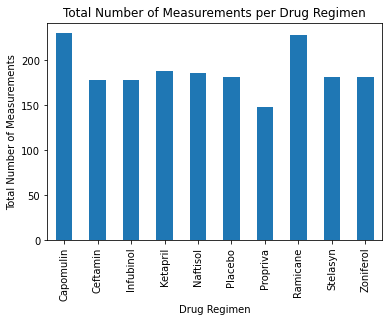

In [113]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_count = mouse_group['Mouse ID'].count()
drug_count.plot(kind='bar')

plt.ylabel("Total Number of Measurements")
plt.title("Total Number of Measurements per Drug Regimen")
plt.show()

''

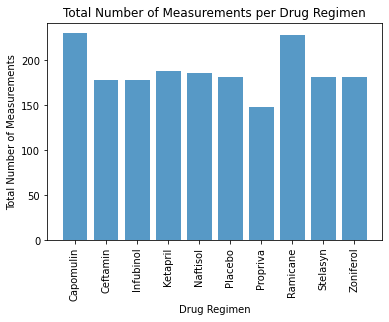

In [114]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using using pyplot.
drugs = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
count = mouse_group['Drug Regimen'].count()

x_axis = np.arange(0, len(count))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.bar(x_axis, count, alpha=0.75, align="center")
plt.xticks(tick_locations, drugs, rotation = 90)
plt.ylabel("Total Number of Measurements")
plt.title("Total Number of Measurements per Drug Regimen")
plt.xlabel('Drug Regimen')
;

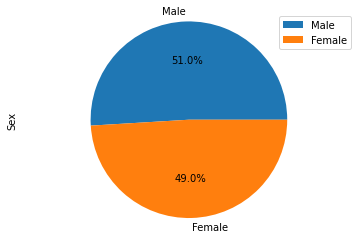

In [115]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_counts = clean_complete_data['Sex'].value_counts()
gender_df = pd.DataFrame(gender_counts)
# gender_df = gender_df.rename(columns={"Sex": "Count"})
gender_df

gender_df.plot(kind="pie", autopct="%1.1f%%", subplots = True)
plt.axis("equal")
plt.show()

In [116]:
gender_df["Percentages"] = ((gender_df['Sex']/gender_df['Sex'].sum())*100)
gender_df

,Sex,Percentages
Male,958,50.957447
Female,922,49.042553


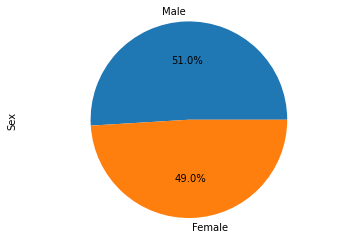

''

In [117]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = ['Male', 'Female']
sizes = ['50.957447', '49.042553']

plt.pie(sizes, labels = gender, autopct="%1.1f%%")
plt.axis("equal")
plt.ylabel("Sex")
plt.show()
;

## Quartiles, Outliers and Boxplots

In [118]:
clean_complete_data.head(1)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0


In [119]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_df = clean_complete_data.loc[clean_complete_data['Drug Regimen'] == 'Capomulin']
ramicane_df = clean_complete_data.loc[clean_complete_data['Drug Regimen'] == 'Ramicane']
infubinol_df = clean_complete_data.loc[clean_complete_data['Drug Regimen'] == 'Infubinol']
ceftamin_df = clean_complete_data.loc[clean_complete_data['Drug Regimen'] == 'Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse
cap_group = capomulin_df.groupby(['Mouse ID'])
cap_max_timepoint = cap_group['Timepoint'].max()

ram_group = ramicane_df.groupby(['Mouse ID'])
ram_max_timepoint = ram_group['Timepoint'].max()

inf_group = infubinol_df.groupby(['Mouse ID'])
inf_max_timepoint = inf_group['Timepoint'].max()

cef_group = ceftamin_df.groupby(['Mouse ID'])
cef_max_timepoint = inf_group['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
capomulin_df = pd.merge(clean_complete_data, cap_max_timepoint, on = ["Mouse ID","Timepoint"], how = "right")
ramicane_df = pd.merge(clean_complete_data, ram_max_timepoint, on = ["Mouse ID","Timepoint"], how = "right")
infubinol_df = pd.merge(clean_complete_data, inf_max_timepoint, on = ["Mouse ID","Timepoint"], how = "right")
ceftamin_df = pd.merge(clean_complete_data, cef_max_timepoint, on = ["Mouse ID","Timepoint"], how = "right")

capomulin_df.head(1)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,45,38.982878,2


In [129]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
cap_tumor_vol_data = capomulin_df['Tumor Volume (mm3)']
ram_tumor_vol_data = ramicane_df['Tumor Volume (mm3)']
inf_tumor_vol_data = infubinol_df['Tumor Volume (mm3)']
cef_tumor_vol_data = ceftamin_df['Tumor Volume (mm3)']

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Determine outliers using upper and lower bounds
cap_quartiles = cap_tumor_vol_data.quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq
cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Determine outliers using upper and lower bounds
ram_quartiles = ram_tumor_vol_data.quantile([.25,.5,.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq-ram_lowerq
ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Determine outliers using upper and lower bounds
inf_quartiles = inf_tumor_vol_data.quantile([.25,.5,.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq-inf_lowerq
inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Determine outliers using upper and lower bounds
cef_quartiles = cef_tumor_vol_data.quantile([.25,.5,.75])
cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]
cef_iqr = cef_upperq-cef_lowerq
cef_lower_bound = cef_lowerq - (1.5*cef_iqr)
cef_upper_bound = cef_upperq + (1.5*cef_iqr)

Text(0.5, 1.0, 'Tumor Volume ')

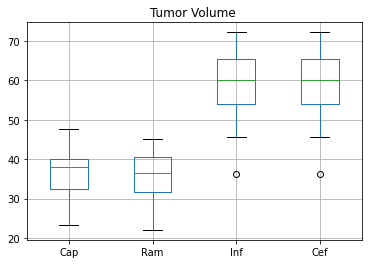

In [131]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
quartiles_df = pd.DataFrame({"Cap": cap_tumor_vol_data,
                             "Ram": ram_tumor_vol_data,
                             "Inf": inf_tumor_vol_data,
                             "Cef": cef_tumor_vol_data})

boxplot = quartiles_df.boxplot(column=['Cap', 'Ram', 'Inf', 'Cef'])
plt.title("Tumor Volume ")

## Line and Scatter Plots

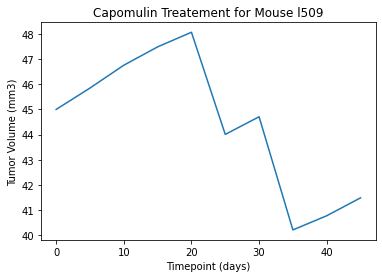

''

In [98]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin = clean_complete_data.loc[clean_complete_data['Drug Regimen'] == "Capomulin", :]
tumor_volume = capomulin.loc[capomulin['Mouse ID'] == 'l509', "Tumor Volume (mm3)"]
timepoint = capomulin.loc[capomulin['Mouse ID'] == 'l509', "Timepoint"]

plt.plot(timepoint, tumor_volume)

plt.title("Capomulin Treatement for Mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()
;

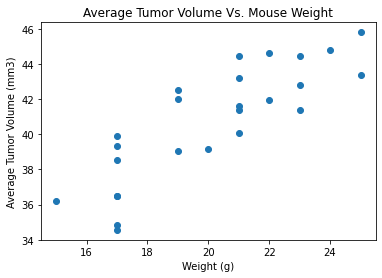

''

In [99]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#group mouse by ID
mouse_groups = capomulin.groupby(['Mouse ID'])
#calculate average weight per mouse
weight = mouse_groups['Weight (g)'].mean()
#calculate average volume per mouse
average_volume = mouse_groups["Tumor Volume (mm3)"].mean()

plt.scatter(weight, average_volume)
plt.title("Average Tumor Volume Vs. Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
;

## Correlation and Regression

The r-squared is: 0.7088568047708717


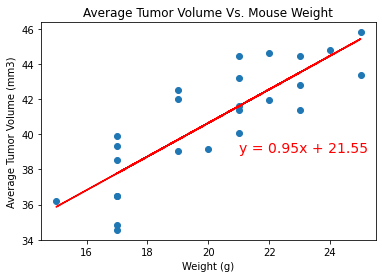

In [100]:
from scipy.stats import linregress

mouse_groups = capomulin.groupby(['Mouse ID'])
#calculate average weight per mouse
weight = mouse_groups['Weight (g)'].mean()
#calculate average volume per mouse
average_volume = mouse_groups["Tumor Volume (mm3)"].mean()

plt.scatter(weight, average_volume)
plt.title("Average Tumor Volume Vs. Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")


# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, average_volume)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(weight,regress_values, "r-")
plt.annotate(line_eq,(21,39),fontsize=14, color="red")
print(f"The r-squared is: {rvalue**2}")